In [19]:
import glob
from os.path import join as pj

waveforms_path = '/data/seismic_toolbox/waveforms'
station_path = glob.glob(pj(waveforms_path, '*'))[3]

In [20]:
noise = glob.glob(pj(station_path, 'noise/*'))
local = glob.glob(pj(station_path, 'local/*'))

In [21]:
from obspy import read

wave_quake = read(local[0])
wave_noise = read(noise[25]) 

def filter_wave(wave):
    return wave.filter('bandpass', freqmin=1, freqmax=30).slice(starttime=wave[0].stats.starttime+5)

wave_quake = filter_wave(wave_quake)
wave_noise = filter_wave(wave_noise)

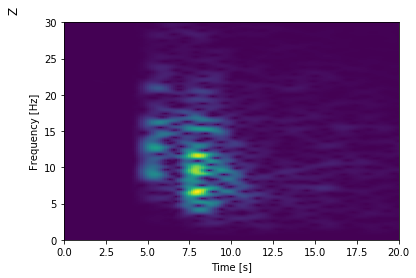

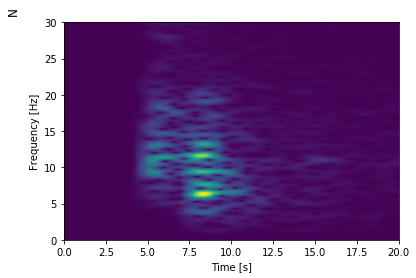

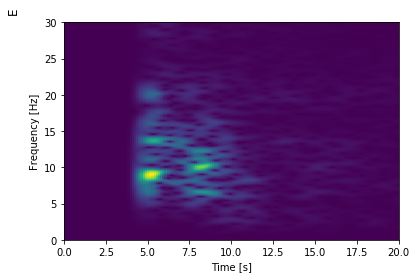

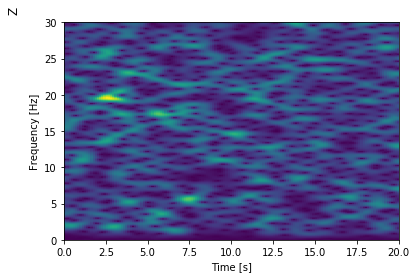

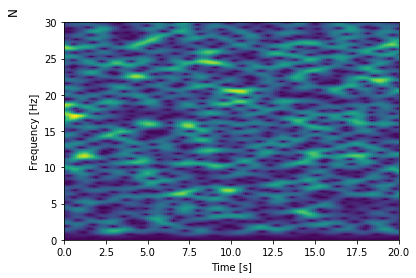

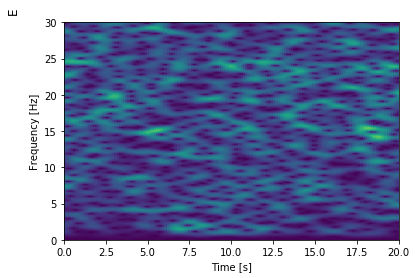

In [25]:
from matplotlib import pyplot as plt
from matplotlib.ticker import NullLocator

import numpy as np

def get_slice(wave):
    start = wave[0].stats.starttime + 5
    return wave.slice(starttime=start)

def show_spectrogram(stream, axis_off=False, title_off=False):
    figure_list = stream.spectrogram(show=False, title="", per_lap=.95)

    for figure, name in zip(figure_list, ['Z', 'N', 'E']):
        axes = figure.gca()
        offset = 2.5
        
        labels = np.arange(0, 21, 2.5)
        axes.set_xticklabels(labels)
        plt.plot()
        
        axes.set_xlim([2.5, 22.5])
        axes.set_ylim([0, 30])
        axes.set_title("" if title_off else name, rotation='vertical',x=-0.15, y=0.47)
        
        if axis_off:
            # Get Rid of Whitespace
            axes.axis("off")
            axes.xaxis.set_major_locator(NullLocator())
            axes.yaxis.set_major_locator(NullLocator())
    
    


    return figure_list

    
# q = get_slice(wave_quake)
# q.spectrogram()

show_spectrogram(wave_quake)
show_spectrogram(wave_noise)
plt.show()

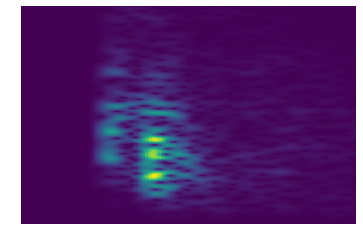

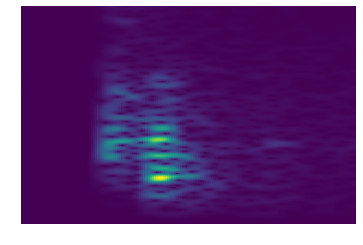

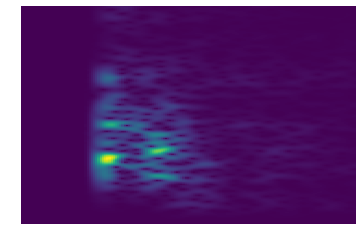

In [23]:
show_spectrogram(wave_quake, axis_off=True, title_off=True)

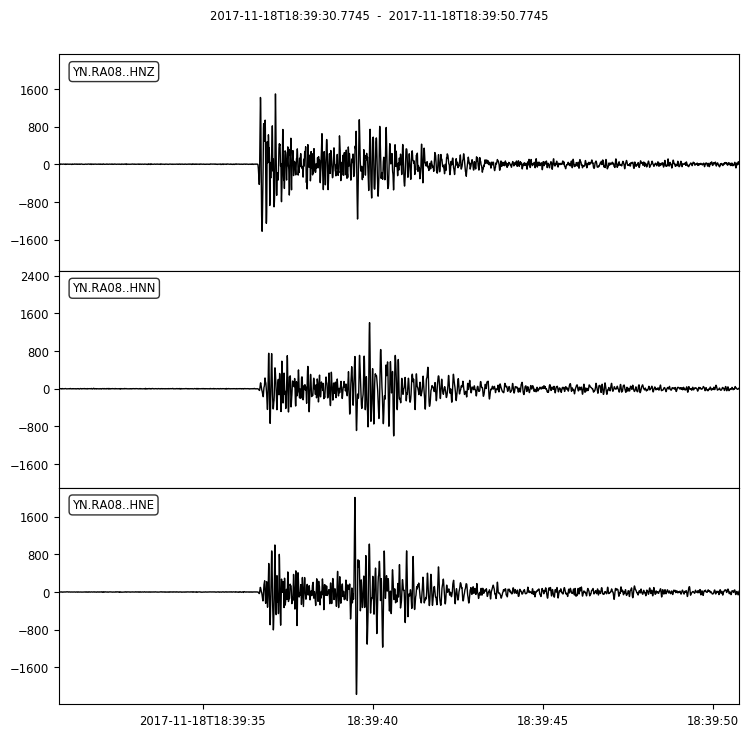

In [207]:
def show_waves(stream, axis_off=False):
    wave = wave_quake.slice(starttime=start, endtime=start + 20)
    wave.plot()
    
show_waves(wave_quake)

AttributeError: 'Colorbar' object has no attribute 'yticks'

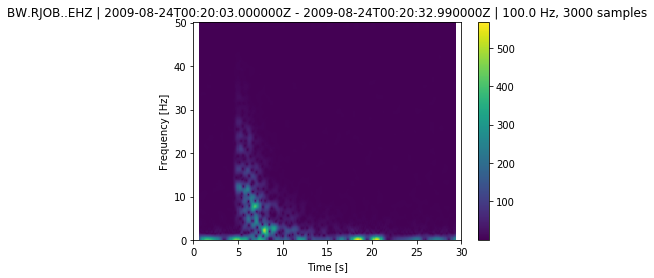

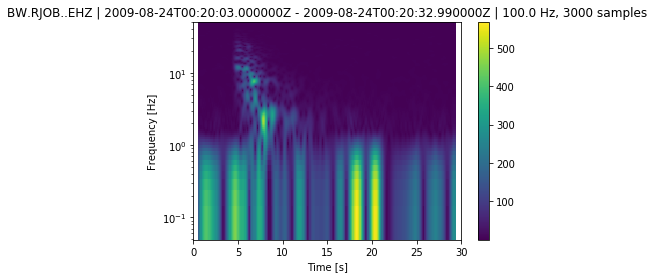

In [67]:
import matplotlib.pyplot as plt 
from obspy import read

tr = read()[0]

fig = tr.spectrogram(show=False)
ax = fig.axes[0]
mappable = ax.images[0]
plt.colorbar(mappable=mappable, ax=ax)

fig = tr.spectrogram(show=False, log=True)
ax = fig.axes[0]
mappable = ax.collections[0]

bar = plt.colorbar(mappable=mappable, ax=ax)
print(bar.yticks())

plt.show()

## Generate Spectrograms from 3 stations for meta learning chart

In [123]:
import random

folder = 'meta-figures'
names = ['Amatrice', 'PuertoRico', 'Oklahoma']

In [107]:
stations = [pj(waveforms_path, station) for station in names]

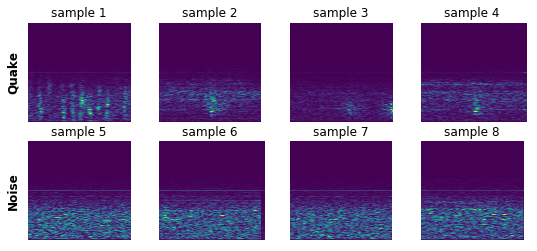

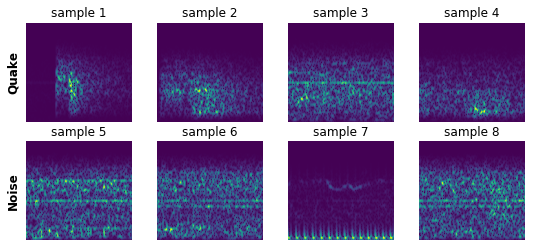

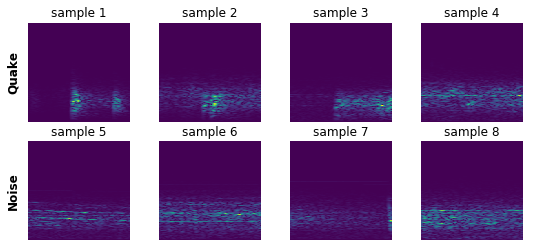

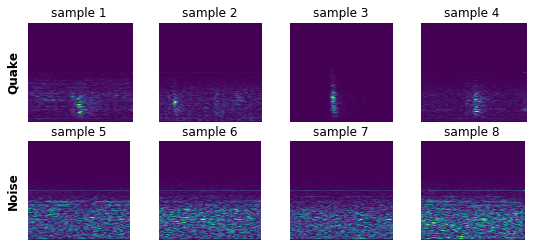

In [150]:
import os 

def format_axes(axes):
    labels = np.arange(0, 21, 2.5)
    axes.set_xticklabels(labels)
    plt.plot()
        
    axes.set_xlim([2.5, 22.5])
    axes.set_ylim([0, 30])
        
    # Get Rid of Whitespace
    axes.xaxis.set_major_locator(NullLocator())
    axes.yaxis.set_major_locator(NullLocator())
    
    plt.box(False)

            

def show_from_station(station_path, index=0, show=True):
    noise = glob.glob(pj(station_path, 'noise/*'))
    local = glob.glob(pj(station_path, 'local/*'))
    
    fig = plt.figure(figsize=(9,4))
    
    for i in range(4):
        quake = local[index + i] 
        noise_ = noise[index + i]
        wave_quake = filter_wave(read(quake))
        wave_noise = filter_wave(read(noise_))

        ax = plt.subplot(2, 4, i+1)
        format_axes(ax)
        wave_quake.spectrogram(show=False, title="", per_lap=.95, axes=ax)
        
        if i == 0: 
            ax.set_ylabel("Quake", rotation=90, size='large', fontweight='bold')

            
        ax.set_title("sample " + str(i+1))


        ax = plt.subplot(2, 4, 5+i)
        format_axes(ax)
        wave_noise.spectrogram(show=False, title="", per_lap=.95, axes=ax)
        
        ax.set_title("sample " + str(5+i))

        
        if i == 0: 
            ax.set_ylabel("Noise", rotation=90, size='large', fontweight='bold')
    
    if show:
        plt.show()
        
    return fig


if not os.path.exists(folder):
    os.mkdir(folder)

fig1 = show_from_station(stations[0], show=False)
plt.savefig(pj(folder, names[0] + '.png'))

fig2 = show_from_station(stations[1], index=23, show=False)
plt.savefig(pj(folder, names[1] + '.png'))

fig3 = show_from_station(stations[2], index=20, show=False)
plt.savefig(pj(folder, names[2] + '.png'))

fig1 = show_from_station(stations[0], index=40, show=False)
